<a href="https://colab.research.google.com/github/RithwikMohan/ML_Lab/blob/main/Gradientdescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply Gradient descent for linear regression on a house price prediction dataset with different learning rates and iterations(epochs)

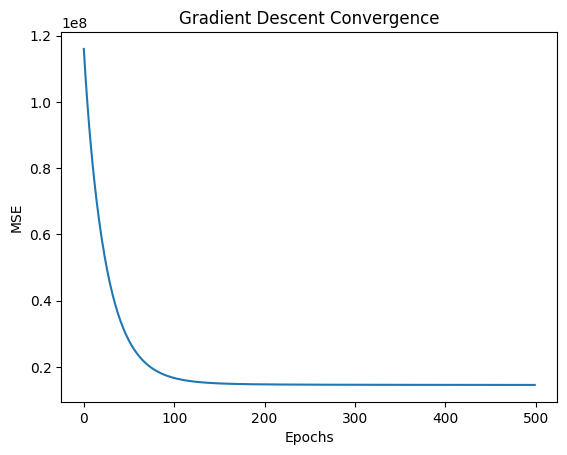

Learned parameters (theta): [[ 9818.75831595]
 [  292.54305474]
 [-1294.50176791]
 [  230.98223689]
 [-1025.46245822]
 [ -341.95041309]
 [ -465.07234961]
 [   42.39687597]
 [  -66.11496259]
 [ -141.90789056]
 [  -82.2391738 ]
 [ -230.16507246]
 [ -404.52943101]
 [ 1504.27713819]
 [ -425.41326123]
 [ -196.24038559]
 [  844.90669463]
 [  161.31707071]
 [  -68.62130569]
 [  153.05568159]
 [  522.29270315]
 [  280.34138466]
 [ -385.06184196]
 [  188.12521092]
 [  368.28703543]
 [ -294.29262955]
 [  237.84068049]
 [  766.51499422]
 [  262.41678884]
 [   87.68462263]
 [  370.75172539]
 [  -17.9920389 ]
 [   51.21864176]
 [  197.17858349]
 [  251.76354968]
 [ -163.41974282]
 [   18.17569708]]

Mean Squared Errors:
Linear Regression: 12743309.304462148
Ridge Regression: 12737377.787549585
Lasso Regression: 12742578.561456183

Coefficients:
Linear: [[  526.70635353 -1181.96173885   397.39630898 -1176.57674945
   -391.64367554  -682.39974449   125.75290488    26.86483344
   -184.73844813  -259.5

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Step 1: Load dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/house_price_test.csv')

# Step 2: Select features and target
# We'll take numeric columns except 'LotArea' as features
features = data.select_dtypes(include=np.number).columns.tolist()
features.remove('LotArea')  # remove target
X = data[features].fillna(0).values  # replace missing with 0
y = data['LotArea'].values.reshape(-1,1)  # target

# Step 3: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term for gradient descent
X_b = np.c_[np.ones((X_scaled.shape[0],1)), X_scaled]

# Step 4: Gradient Descent function
def gradient_descent(X, y, lr=0.01, n_epochs=500):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    cost_history = []

    for epoch in range(n_epochs):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - lr * gradients
        cost_history.append(np.mean((X.dot(theta) - y)**2))

    return theta, cost_history

# Run gradient descent
theta, cost_history = gradient_descent(X_b, y, lr=0.01, n_epochs=500)

# Plot convergence
plt.plot(cost_history)
plt.title("Gradient Descent Convergence")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

print("Learned parameters (theta):", theta)

# Step 5: Regularization (Ridge & Lasso)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Linear, Ridge, Lasso
lin_reg = LinearRegression().fit(X_train, y_train)
ridge_reg = Ridge(alpha=1.0).fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# MSE
print("\nMean Squared Errors:")
print("Linear Regression:", mean_squared_error(y_test, y_pred_lin))
print("Ridge Regression:", mean_squared_error(y_test, y_pred_ridge))
print("Lasso Regression:", mean_squared_error(y_test, y_pred_lasso))

# Coefficients
print("\nCoefficients:")
print("Linear:", lin_reg.coef_)
print("Ridge:", ridge_reg.coef_)
print("Lasso:", lasso_reg.coef_)


Demonstrate the use of Apply Regularization methods (LASSO and RIDGE) on nonlinear data and display the coefficient values and MSE to address the overfitting problem.


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np # Import numpy for median calculation

# Load dataset
file_path = '/content/drive/MyDrive/Datasets/house_price_test.csv'
data = pd.read_csv(file_path)

# Handle missing target (LotArea) - though we will use numerical features as X and LotArea as y
# Let's assume we are predicting LotArea for this example.
# We will fill missing LotArea values in the target variable
data['LotArea'] = data['LotArea'].fillna(data['LotArea'].median())


# Select numeric features and remove target 'LotArea' from features if it's included
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
if 'LotArea' in numeric_features:
    numeric_features.remove('LotArea')

X = data[numeric_features].copy() # Create a copy to avoid SettingWithCopyWarning

print("NaNs in X before filling:", X.isnull().sum().sum())

# Fill missing values in numerical features with the median of each column
for col in X.columns:
    X.loc[:, col] = X.loc[:, col].fillna(X.loc[:, col].median())

print("NaNs in X after filling:", X.isnull().sum().sum())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("NaNs in X_scaled before PolynomialFeatures:", np.isnan(X_scaled).sum())


# Generate nonlinear features (Polynomial features)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# -----------------------------
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# -----------------------------
# Lasso Regression
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test) # Corrected from y_test to X_test
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# -----------------------------
# Display results
print("Ridge Regression:")
print("MSE:", mse_ridge)
print("Number of non-zero coefficients:", (ridge.coef_ != 0).sum())

print("\nLasso Regression:")
print("MSE:", mse_lasso)
print("Number of non-zero coefficients:", (lasso.coef_ != 0).sum())

# Optional: Display first 10 coefficients for clarity
print("\nRidge Coefficients (first 10):", ridge.coef_[:10])
print("Lasso Coefficients (first 10):", lasso.coef_[:10])

NaNs in X before filling: 330
NaNs in X after filling: 0
NaNs in X_scaled before PolynomialFeatures: 0
Ridge Regression:
MSE: 23905241.53892813
Number of non-zero coefficients: 702

Lasso Regression:
MSE: 32979383.665531028
Number of non-zero coefficients: 618

Ridge Coefficients (first 10): [  798.75826258 -1355.54566205   922.53566968    84.65311458
  -727.27107014   855.7267001    435.03923373  -997.12955449
   623.32847768  -435.66506853]
Lasso Coefficients (first 10): [  667.42007735 -1511.20699132  1217.92622368    75.25465427
  -643.11484118  1349.11873533   438.16358933  -989.28260645
  1038.87209215  -230.03499866]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.898e+09, tolerance: 2.944e+06
  model = cd_fast.enet_coordinate_descent(
